In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pyriemann

     |████████████████████████████████| 42 kB 1.2 MB/s 
  Created wheel for pyriemann: filename=pyriemann-0.2.7-py2.py3-none-any.whl size=49770 sha256=7df15430d0d53fcdff3385078aca4a10b8e740f8cfc7e9b6a4ec6f93f493ddb2
  Stored in directory: /root/.cache/pip/wheels/5c/b7/55/27dcb08ed8fb58da8c1be108c23928ffb9125c9c1da2ddfb53
Successfully built pyriemann


In [ ]:
import pandas as pd
import random
from pyriemann.estimation import XdawnCovariances , Covariances
from pyriemann.tangentspace import TangentSpace
from os.path import isfile
import numpy as np
import h5py
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X_train=np.load('/content/drive/MyDrive/2021_VIIT08_P300/Dataset/erp-bci/Raw Data/X_train.npy')
X_test=np.load('/content/drive/MyDrive/2021_VIIT08_P300/Dataset/erp-bci/Raw Data/X_test.npy')
Y_test = np.load ('/content/drive/MyDrive/2021_VIIT08_P300/Dataset/erp-bci/Raw Data/Y_test.npy')
Y_train = np.load ('/content/drive/MyDrive/2021_VIIT08_P300/Dataset/erp-bci/Raw Data/Y_train.npy')

In [ ]:
np.count_nonzero(Y_train == 'pos'),np.count_nonzero(Y_train == 'neg')

(6770, 39801)

In [ ]:
pip install imblearn


In [ ]:
from imblearn.under_sampling  import RandomUnderSampler
rs=RandomUnderSampler(sampling_strategy=0.5)


In [ ]:
# collapse first two dimension
    train_data = np.reshape(train_data_list, 
    (16 * stimulus_per_subj, len(channels), epoch_len))
    test_data = np.reshape(test_data_list, 
    (test_subj_num * stimulus_per_subj, len(channels), epoch_len))

(46571, 76, 16)

In [ ]:
x,y,z= X_train.shape
a= np.reshape(X_train, (x,y*z))
print(a.shape)

(46571, 1216)


In [ ]:
Y_train.shape

(46571,)

In [ ]:
X_resampled,y_resampled=rs.fit_resample(a,Y_train)
X_resampled.shape,y_resampled.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((20310, 1216), (20310,))

In [ ]:
X_resampled[y_resampled=='pos'].shape, X_resampled[y_resampled=='neg'].shape

((6770, 1216), (13540, 1216))

In [ ]:
X_resampled = np.reshape(X_resampled,(X_resampled.shape[0],y,z))

In [ ]:
X_resampled=np.swapaxes(X_resampled,1,2)


In [ ]:
X_resampled.shape

(20310, 16, 76)

In [ ]:
### Now doing the same with Test Data:
#converted 3d to 2d
x,y,z= X_test.shape
arr = np.reshape(X_test, (x,y*z))
print(arr.shape)

(10096, 1216)


In [ ]:
X_under_test, y_under_test = rs.fit_resample(arr, Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_under_test[y_under_test=='pos'].shape, X_under_test[y_under_test=='neg'].shape

((1435, 1216), (2870, 1216))

In [ ]:
X_under_test = np.reshape(X_under_test,(X_under_test.shape[0],y,z))

In [ ]:
X_under_test.shape,y_under_test.shape

((4305, 76, 16), (4305,))

In [ ]:
X_under_test=np.swapaxes(X_under_test, 1,2)

In [ ]:
X_under_test.shape

(4305, 16, 76)

In [ ]:
pip install mne-features

     |████████████████████████████████| 6.9 MB 6.3 MB/s 


In [ ]:
from mne_features.feature_extraction import extract_features
from mne_features.univariate import get_univariate_funcs

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:

get_univariate_funcs(128) #left ke keys are aliases to function

{'app_entropy': <function mne_features.univariate.compute_app_entropy>,
 'decorr_time': functools.partial(<function compute_decorr_time at 0x7f09d88638c0>, 128),
 'energy_freq_bands': functools.partial(<function compute_energy_freq_bands at 0x7f09d84ba290>, 128),
 'higuchi_fd': <function mne_features.univariate.compute_higuchi_fd>,
 'hjorth_complexity': <function mne_features.univariate.compute_hjorth_complexity>,
 'hjorth_complexity_spect': functools.partial(<function compute_hjorth_complexity_spect at 0x7f09d8863dd0>, 128),
 'hjorth_mobility': <function mne_features.univariate.compute_hjorth_mobility>,
 'hjorth_mobility_spect': functools.partial(<function compute_hjorth_mobility_spect at 0x7f09d8863d40>, 128),
 'hurst_exp': <function mne_features.univariate.compute_hurst_exp>,
 'katz_fd': <function mne_features.univariate.compute_katz_fd>,
 'kurtosis': <function mne_features.univariate.compute_kurtosis>,
 'line_length': <function mne_features.univariate.compute_line_length>,
 'mean':

In [ ]:
X_resampled.shape

(20310, 16, 76)

In [ ]:
params1=['mean','variance','std']
new_X1=extract_features(X_resampled,128, params1 )
new_X1.shape

(20310, 48)

In [ ]:
params2=['higuchi_fd','hurst_exp']
new_X2=extract_features(X_resampled,128, params2  )
new_X2.shape

(20310, 32)

In [ ]:
params3=['spect_entropy','ptp_amp']
new_X3=extract_features(X_resampled,128, params3 )
new_X3.shape

(20310, 32)

In [ ]:

params4 =['wavelet_coef_energy']
new_x4 =extract_features(X_resampled,128, params4 )
new_x4.shape

(20310, 48)

In [ ]:
params5=['skewness','kurtosis','app_entropy','samp_entropy']
new_X5=extract_features(X_resampled,128,params5)
new_X5.shape

(20310, 64)

In [ ]:
params6=['svd_entropy','svd_fisher_info']
new_X6=extract_features(X_resampled,128,params6)
new_X6.shape

(20310, 32)

In [ ]:
params7=['spect_slope','hjorth_complexity']
new_X7=extract_features(X_resampled,128,params7)
new_X7.shape

(20310, 80)

In [ ]:
params8=['decorr_time','katz_fd','zero_crossings']
new_X8=extract_features(X_resampled,128,params8)
new_X8.shape

(20310, 48)

In [ ]:
params9=['line_length','spect_edge_freq','teager_kaiser_energy']
new_X9=extract_features(X_resampled,128,params9)
new_X9.shape

(20310, 160)

In [ ]:
X_train_new= np.concatenate((new_X1,new_X2,new_X3,new_x4,new_X5,new_X6,new_X7,new_X8,new_X9),axis=1)

In [ ]:
X_train_new.shape

(20310, 544)

In [ ]:
np.save('/content/drive/MyDrive/2021_VIIT08_P300/Dataset/erp-bci/Sem 2/Linear and Non Linear Features/X_train',X_train_new)


FileNotFoundError: ignored

In [ ]:
import numpy as np

In [ ]:
X_train_new=np.load('/content/drive/MyDrive/2021_VIIT08_P300/Dataset/erp-bci/Sem 2/Linear and Non Linear Features/X_train.npy')

In [ ]:
# XC = XdawnCovariances(nfilter=4,estimator='oas',xdawn_estimator="oas") # our transformer
# TS = TangentSpace(metric='riemann')
# new_x5 = XC.fit_transform(X_resampled,y_resampled)
# # X_train = fit_transform(train_data)
# print("Xdawn Covariances", new_x5.shape)

(20310, 544)

**Univariate** Feature Selection

**Annova Applied Here**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
import numpy as np


In [ ]:
np.any(np.isnan(X_train_new))


False

In [ ]:
np.all(np.isfinite(X_train_new))

False

In [ ]:
print(np.count_nonzero(np.isinif(a_nan), axis=1))

NameError: ignored

In [ ]:
X_train_new = np.nan_to_num(X_train_new)  #this linr replaces the infinity values with high finite values and the nan values with numbers

In [ ]:
test = SelectKBest(score_func=f_classif, k=200)
fit = test.fit(X_train_new, y_resampled)

In [ ]:
X_df = pd.DataFrame(X_train_new)

In [ ]:
y_df=pd.DataFrame(y_resampled)

In [ ]:
dfscores = pd.DataFrame(fit.scores_) #fit_scores calculates scores wrt chi square test values
dfcolumns = pd.DataFrame(X_df.columns) #creating colums

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1) 
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [ ]:
featureScores

,Specs,Score
0,0,12.154297
1,1,1.266076
2,2,3.759245
3,3,31.425522
4,4,5.495611
...,...,...
539,539,2.367783
540,540,0.440580
541,541,0.018842
542,542,0.104410


In [ ]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

     Specs      Score
7        7  53.966571
10      10  44.530205
6        6  38.761986
8        8  36.265335
14      14  33.649687
3        3  31.425522
51      51  26.024106
9        9  22.392580
15      15  18.488520
120    120  15.420019


**Plot Feature Importance (look at previous colabs for code)**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_df,y_resampled)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print(model.feature_importances_)

[0.00206716 0.00185503 0.00201132 0.00212591 0.00204981 0.00211177
 0.0021533  0.00218114 0.00225821 0.0021226  0.00234854 0.00205774
 0.00209664 0.00203457 0.0022966  0.00204861 0.00172638 0.0015789
 0.00170718 0.00166766 0.00162491 0.00173415 0.00166746 0.00179881
 0.00165473 0.00170842 0.00164733 0.00173912 0.00178321 0.0016731
 0.00181923 0.00168058 0.00178355 0.00176549 0.00170173 0.00188231
 0.00168506 0.00177464 0.00178593 0.00173742 0.00178167 0.00169748
 0.00178626 0.00188889 0.00173747 0.00182091 0.00177161 0.00162671
 0.00187184 0.00187039 0.00199794 0.00224278 0.00192555 0.00186032
 0.00192096 0.00183158 0.00199198 0.00195018 0.00182102 0.00177985
 0.00185167 0.00202401 0.0019074  0.00188834 0.00193354 0.00202157
 0.00207705 0.00212237 0.00211539 0.00194106 0.00206744 0.00206353
 0.00212741 0.00180448 0.00200216 0.00193425 0.00198255 0.00207623
 0.0021115  0.00201201 0.00181815 0.00182836 0.00181836 0.00196903
 0.00189904 0.00190424 0.00188192 0.00191321 0.00178269 0.001904

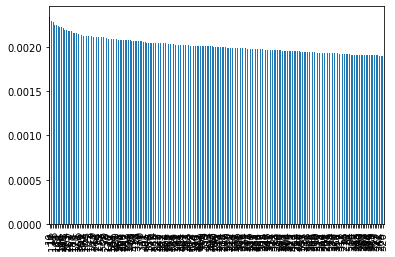

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_df.columns)
feat_importances.nlargest(200).plot(kind='bar')
plt.show()

**Mutual Information/Information Gain**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train_new, y_resampled)
mutual_info

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: ignored

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Selecting Top 5 **features**

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

**Correlation Matrix with Heatmap**

In [ ]:
data=np.column_stack((X_train_new, y_resampled))

In [ ]:
data.shape

(20310, 277)

Converting np array to df

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df.shape

(20310, 277)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

NameError: ignored

In [ ]:
df.corr()

""


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train_new)
X_train_scaled=scaler.transform(X_train_new)


In [ ]:
from sklearn.svm import SVC

In [ ]:
model=SVC(kernel='linear') #kernel nahi diya toh it's rbf by default
model.fit(X_train_scaled,y_resampled)

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
confusion_matrix(X_train_scaled, y_resampled)